In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, glob

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 7.0.1
OS Darwin 18.0.0 x86_64 i386 64bit
numpy 1.15.2
dlib 19.16.0
matplotlib 3.0.0
imageio 2.4.1
gaze The 'gaze' distribution was not found and is required by the application
glob The 'glob' distribution was not found and is required by the application
Thu Oct 18 09:26:23 2018 CEST

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# detecting and cropping faces

In [ ]:
import os
import glob


In [ ]:
from gaze import init, Data
args = init(batch_size=8, no_cuda=True, verbose=1)
d = Data(args)

Found 1988 sample images;  1591  to train 397 to test


In [ ]:
args

{'dataset_folder': 'dataset',
 'dataset_faces_folder': 'dataset_faces',
 'batch_size': 8,
 'test_batch_size': 1,
 'size_test_set': 0.2,
 'epochs': 40,
 'do_adam': False,
 'lr': 0.025,
 'momentum': 0.05,
 'no_cuda': True,
 'num_processes': 1,
 'seed': 42,
 'log_interval': 0,
 'fullsize': 75,
 'crop': 64,
 'size': 64,
 'mean': 0.4,
 'std': 0.3,
 'conv1_dim': 9,
 'conv1_kernel_size': 18,
 'conv2_dim': 36,
 'conv2_kernel_size': 14,
 'conv1_bn_momentum': 0.9,
 'conv2_bn_momentum': 0.9,
 'dense_bn_momentum': 0.9,
 'stride1': 2,
 'stride2': 4,
 'N_cv': 4,
 'dimension': 30,
 'verbose': 1}

In [ ]:
n_show = 10
for target in d.classes:
    for filename in glob.glob(os.path.join(args.dataset_folder, target) + '/*.png')[-n_show:]:
        print(filename)

dataset/blink/2018-09-14_Laurent_121.png
dataset/blink/2018-09-04_Laurent_180.png
dataset/blink/2018-10-03_Laurent_116.png
dataset/blink/2018-09-12_Laurent_020.png
dataset/blink/2018-10-12_Laurent_065.png
dataset/blink/2018-09-05_Laurent_085.png
dataset/blink/2018-10-14_Laurent_212.png
dataset/blink/2018-09-14_Laurent_069.png
dataset/blink/2018-10-18_Laurent_123.png
dataset/blink/2018-10-18_Laurent_137.png
dataset/center/2018-09-05_Laurent_091.png
dataset/center/2018-09-04_Laurent_16.png
dataset/center/2018-09-12_Laurent_140.png
dataset/center/2018-09-14_Laurent_243.png
dataset/center/2018-09-12_Laurent_183.png
dataset/center/2018-09-04_Laurent_221.png
dataset/center/2018-09-04_Laurent_235.png
dataset/center/2018-10-14_Laurent_004.png
dataset/center/2018-10-03_Laurent_089.png
dataset/center/2018-10-03_Laurent_076.png
dataset/left/2018-10-12_Laurent_105.png
dataset/left/2018-09-12_Laurent_154.png
dataset/left/2018-10-12_Laurent_111.png
dataset/left/2018-10-12_Laurent_139.png
dataset/lef

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_106.png


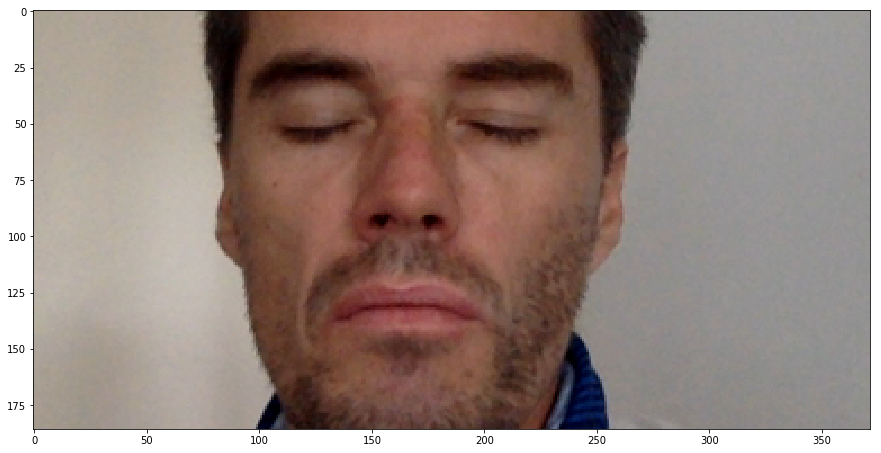

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_099.png


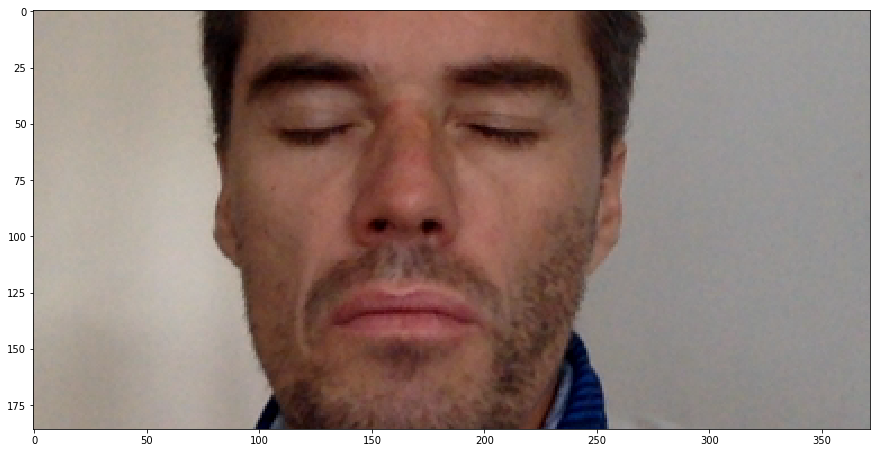

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_066.png


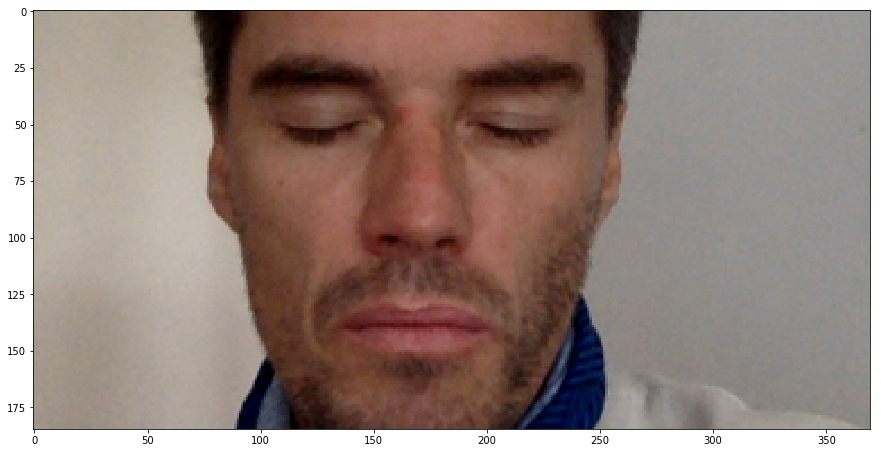

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_111.png


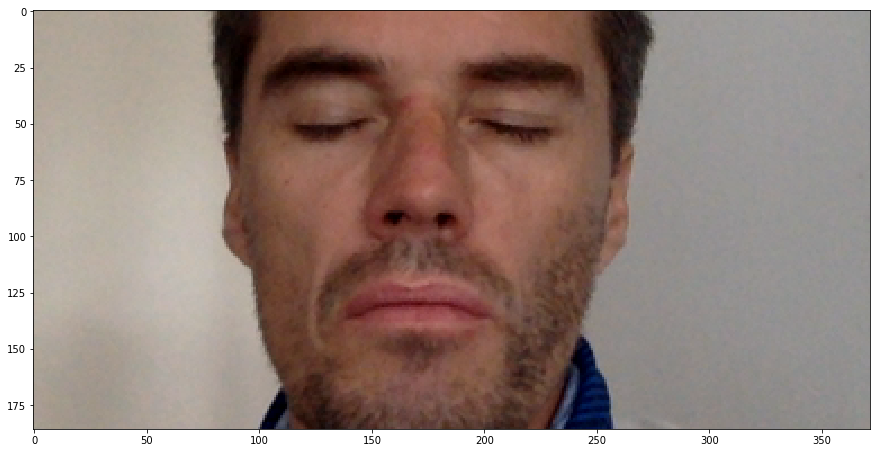

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_071.png


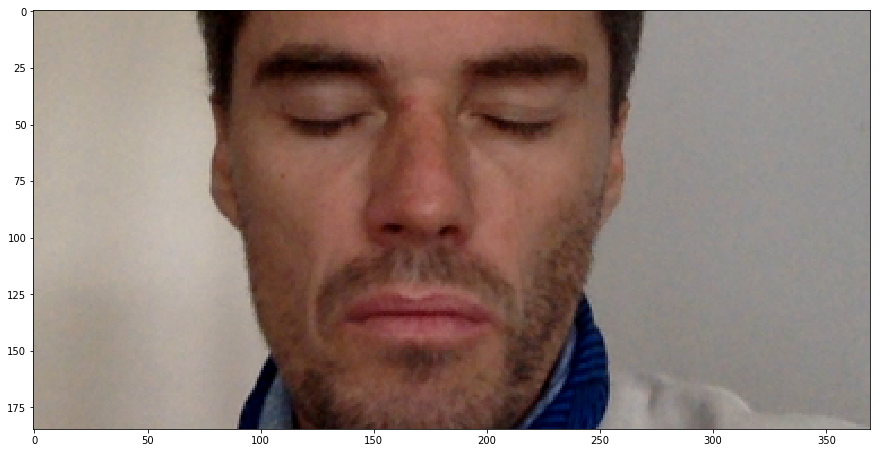

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_070.png


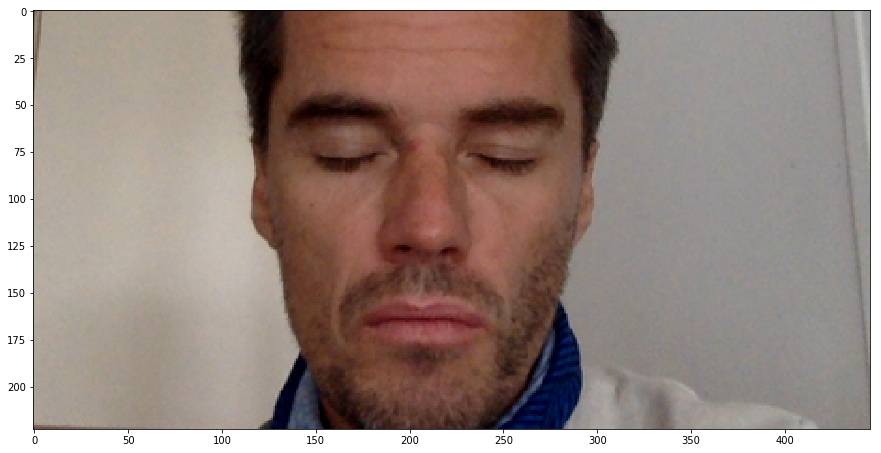

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_114.png


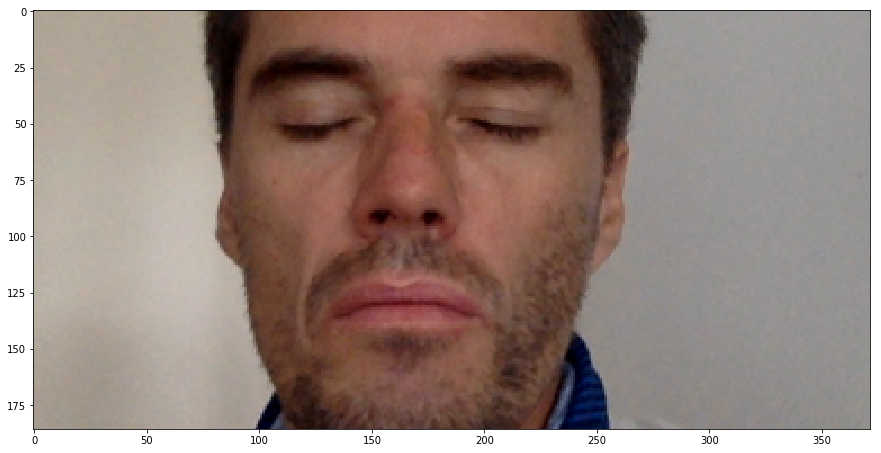

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_060.png


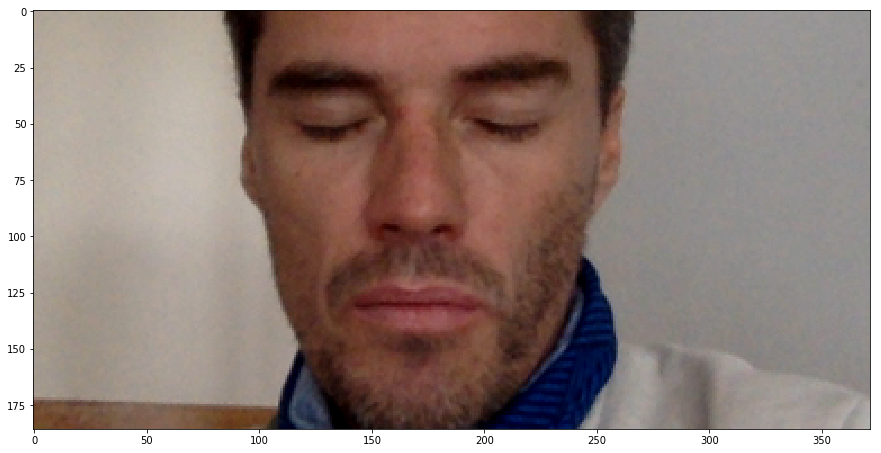

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_049.png


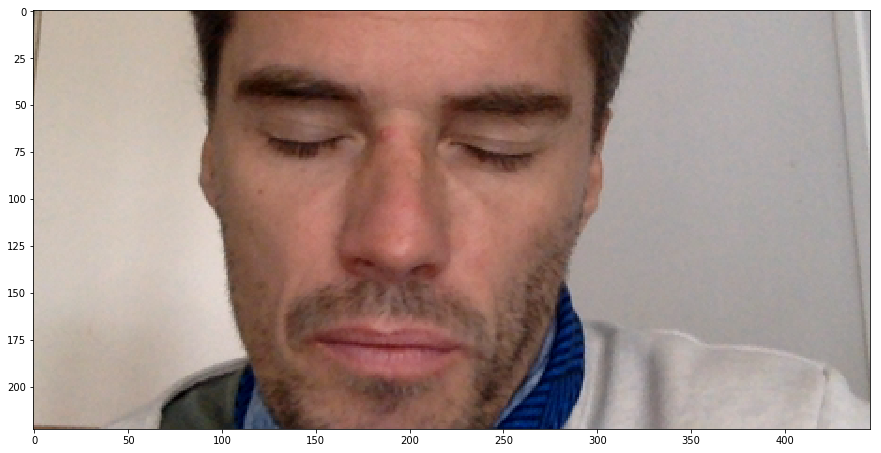

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_075.png


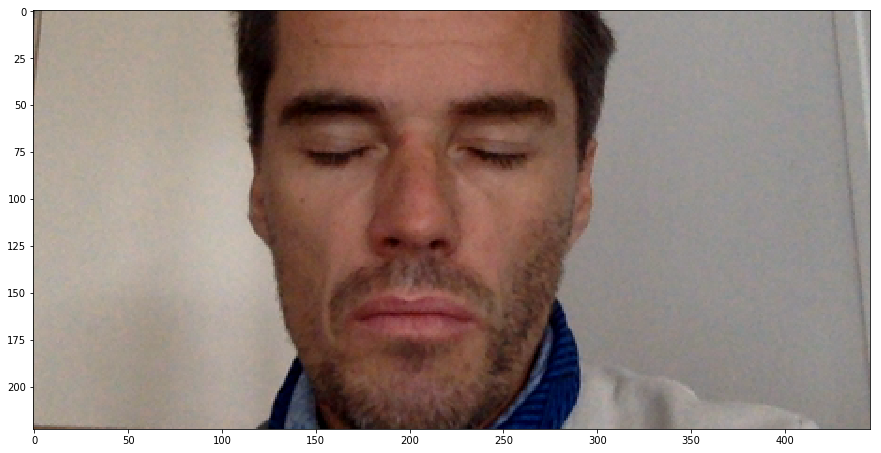

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_103.png


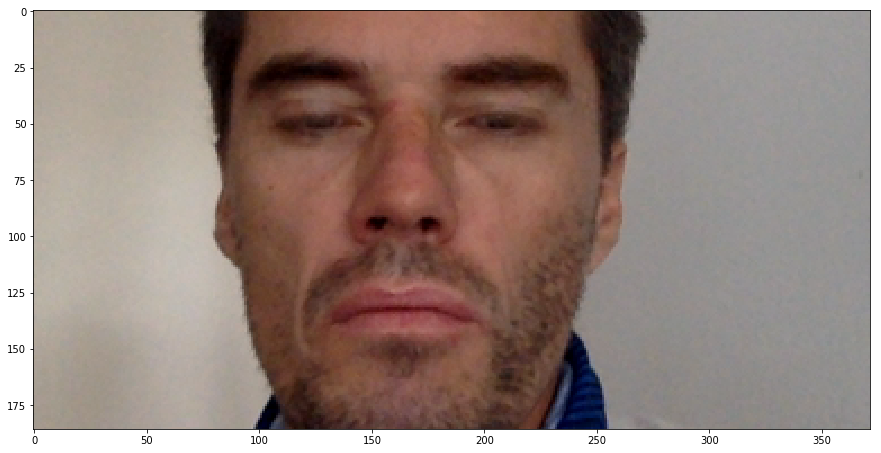

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_249.png


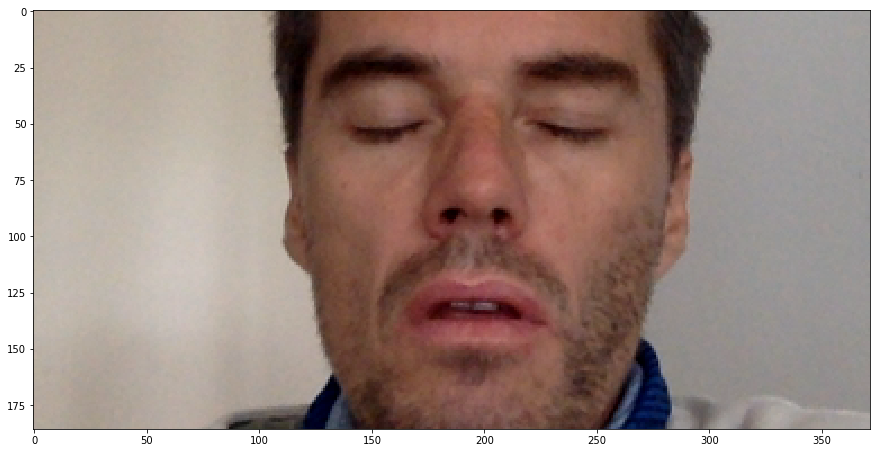

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_063.png


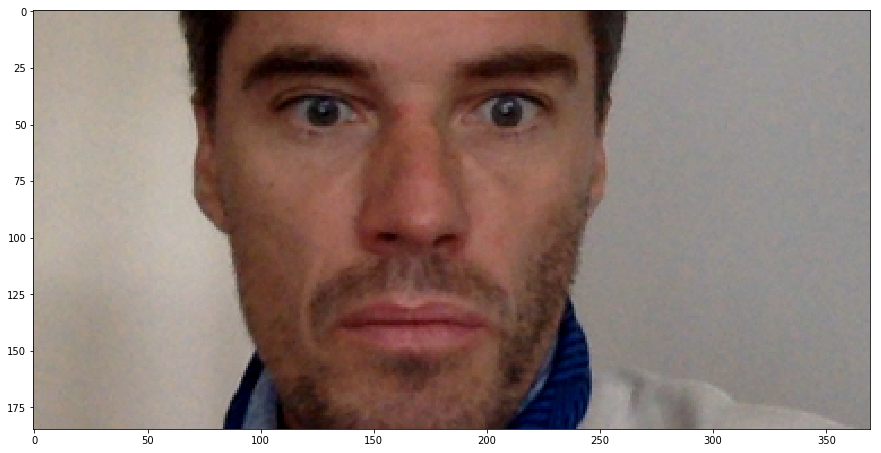

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_102.png


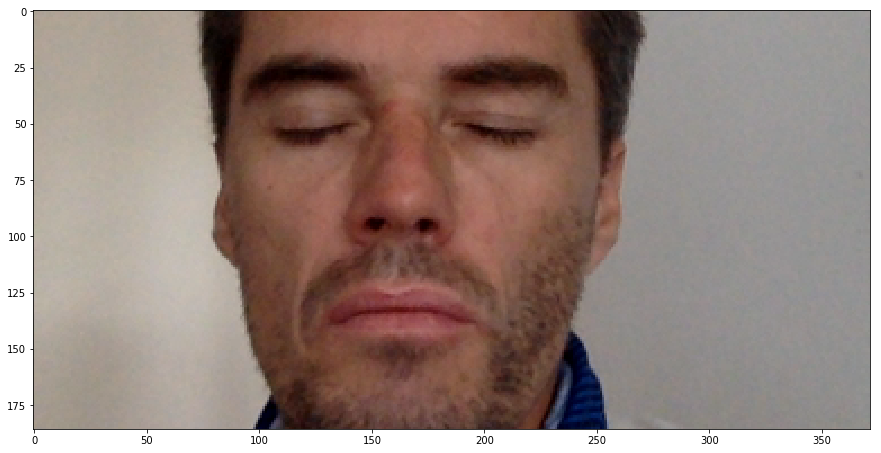

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_159.png


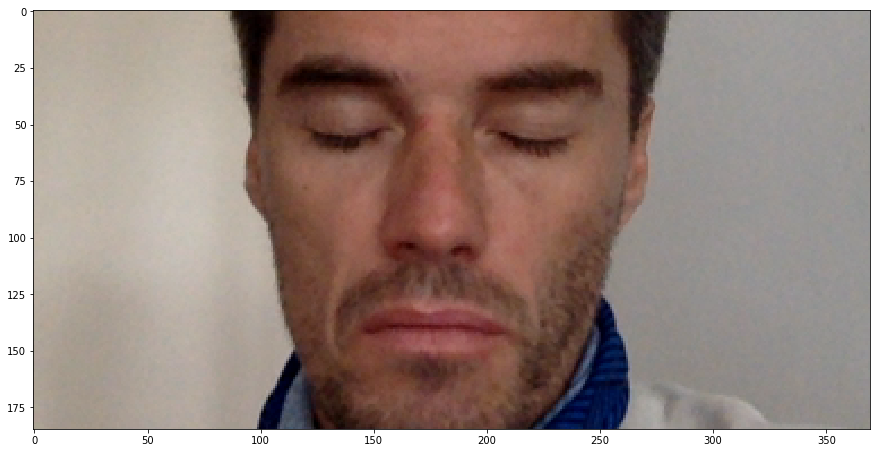

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_207.png


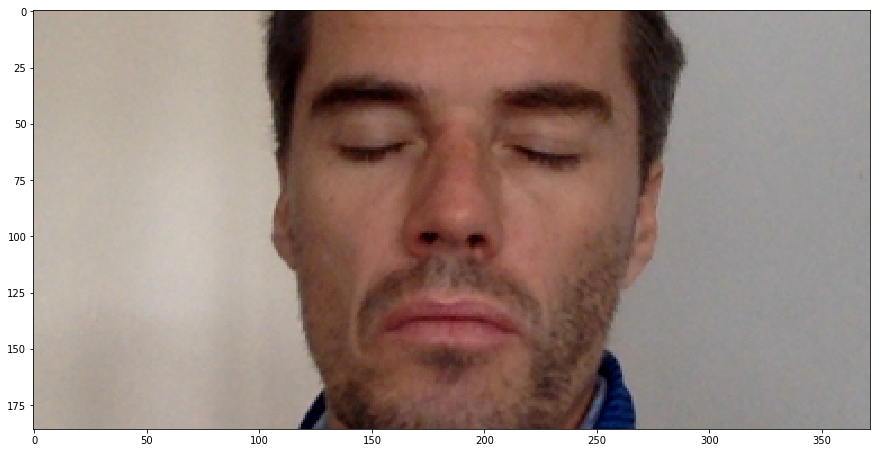

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_005.png


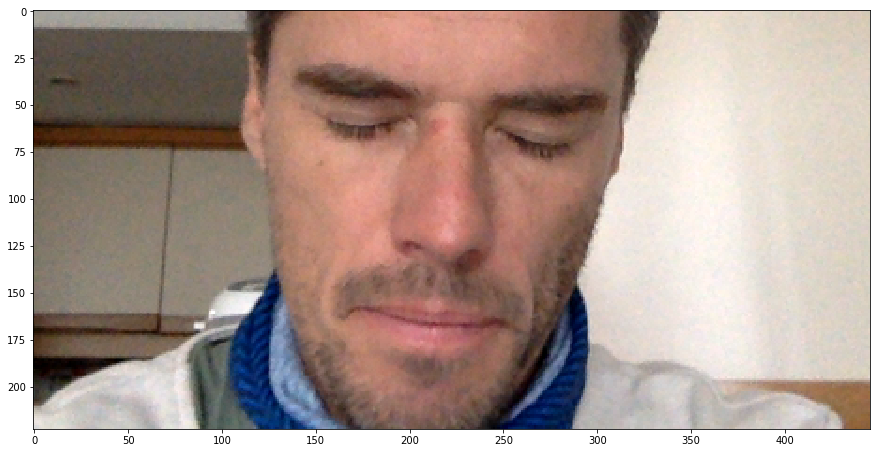

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_170.png


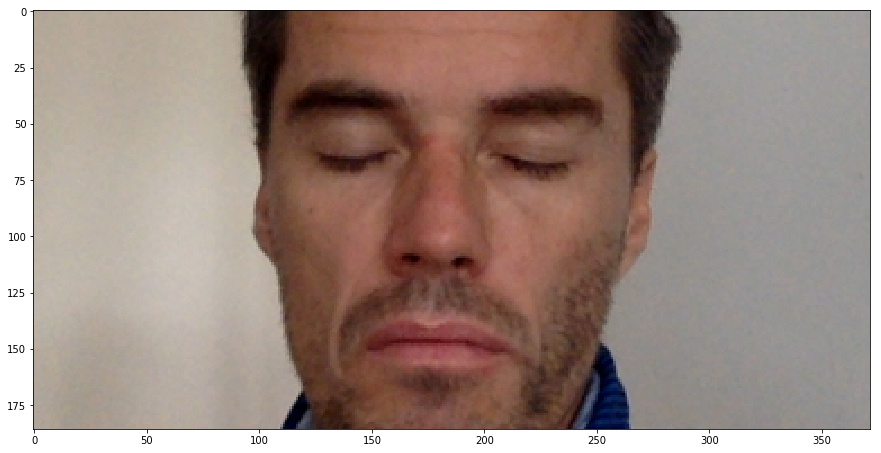

Extracting face in  dataset_faces/blink/2018-10-18_Laurent_158.png


In [ ]:
import imageio
import time
from gaze import FaceExtractor
FE = FaceExtractor()
timings = []
for target in d.classes:
    for filename in glob.glob(os.path.join(args.dataset_folder, target, '*.png')):
        filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)
        if not os.path.exists(filename_face):
            print('Extracting face in ', filename_face)
            frame = imageio.imread(filename)
            t0 = time.time()
            t, b, l, r = FE.get_bbox(frame)
            face = FE.face_extractor(frame, bbox=(t, b, l, r))
            t1 = time.time()
            timings.append(t1-t0)
            if False:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the image
                ax.imshow(frame)

                # Create a Rectangle patch
                from matplotlib import patches
                rect = patches.Rectangle((t, l), r-l, t-b, linewidth=1, edgecolor='r', facecolor='none')

                # Add the patch to the Axes
                ax.add_patch(rect)
                plt.show()
                
            if True:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the cropped image
                ax.imshow(face)

                plt.show()                

            imageio.imwrite(filename_face, face) 


In [ ]:
if len(timings)>0:
    timings = np.array(timings) * 1000
    print('timings in ms =', timings.mean(), '+/-', timings.std()) 
    fig, ax = plt.subplots(figsize=((8, 5)))
    n, bins, patches = ax.hist(timings, bins=np.linspace(100, 200, 100), alpha=.4)
    ax.vlines(np.median(timings), 0, n.max(), 'g', linestyles='dashed', label='median = %.3f ms' % np.median(timings))
    #ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
    #ax.vlines(100, 0, n.max(), 'k', label='max')
    ax.set_xlabel('Timings (ms)')
    ax.set_ylabel('Smarts')
    ax.legend(loc='best')
    if True:
        plt.show() 
    else:
        plt.savefig('figures/dlib_timings.png')